In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


In [9]:
casc_path = '/Users/mac/opencv-python-4.5.3.56/opencv/data/haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(casc_path)


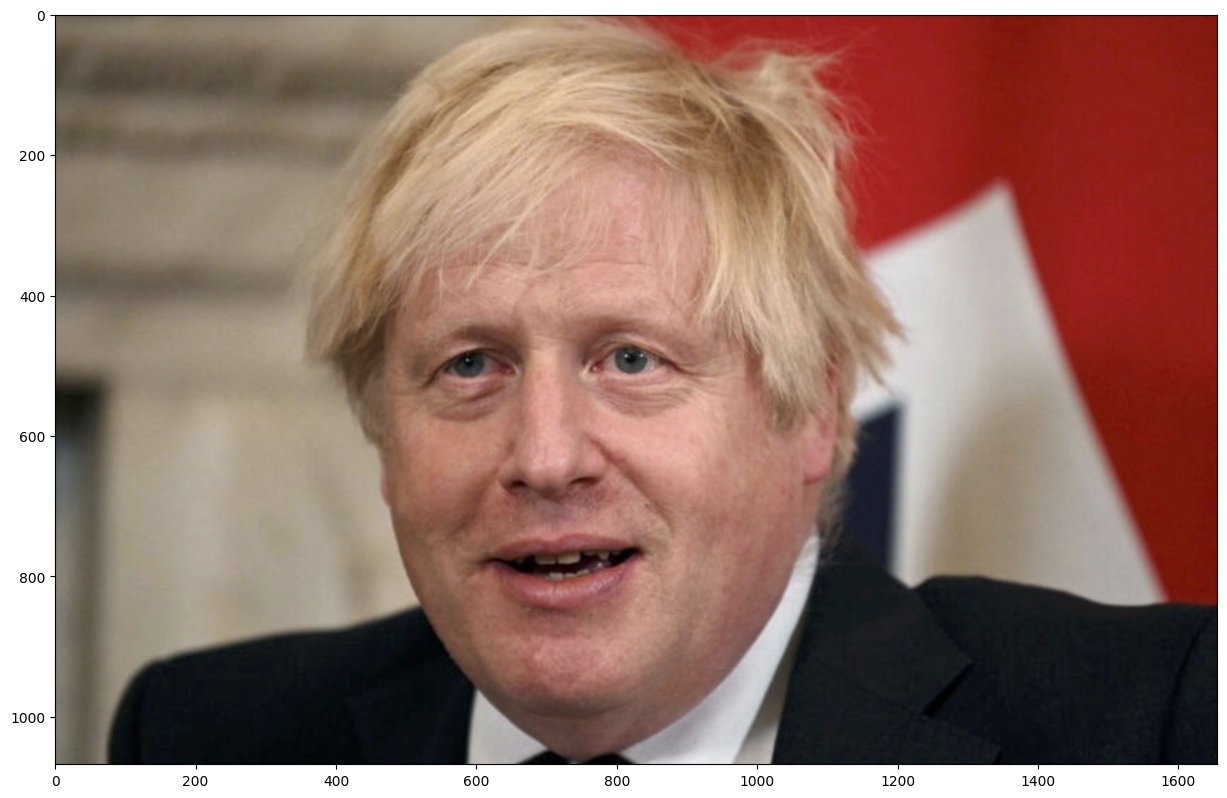

In [10]:
img = cv2.imread('611.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

Number of detected faces: 1


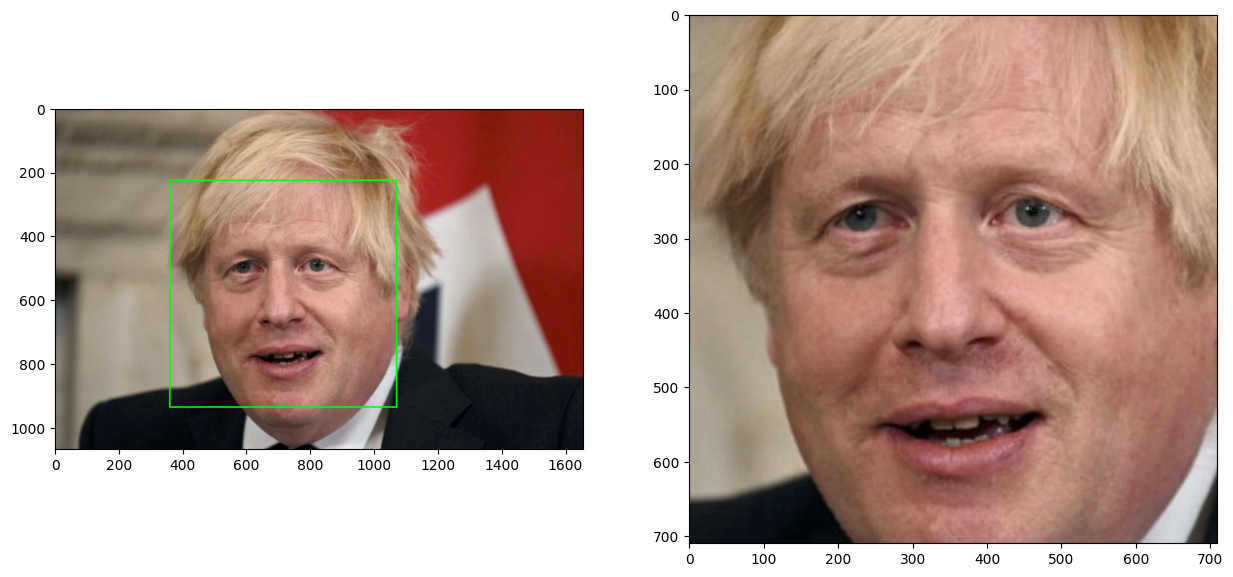

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Perform face detection
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, flags=cv2.CASCADE_SCALE_IMAGE)

# Print the number of detected faces
print('Number of detected faces:', len(faces))

# Draw rectangles around each detected face on the original image
result = np.copy(img)
for (x, y, w, h) in faces:
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Display the original image with bounding boxes around detected faces
plt.subplot(121), plt.imshow(result, cmap='gray')

# Display each detected face separately
plt.subplot(122)
for (x, y, w, h) in faces:
    face_img = img[y:y+h, x:x+w, :]
    plt.imshow(face_img)
    plt.show()



(<Axes: >, <matplotlib.image.AxesImage at 0x7a6d4f5ba860>)

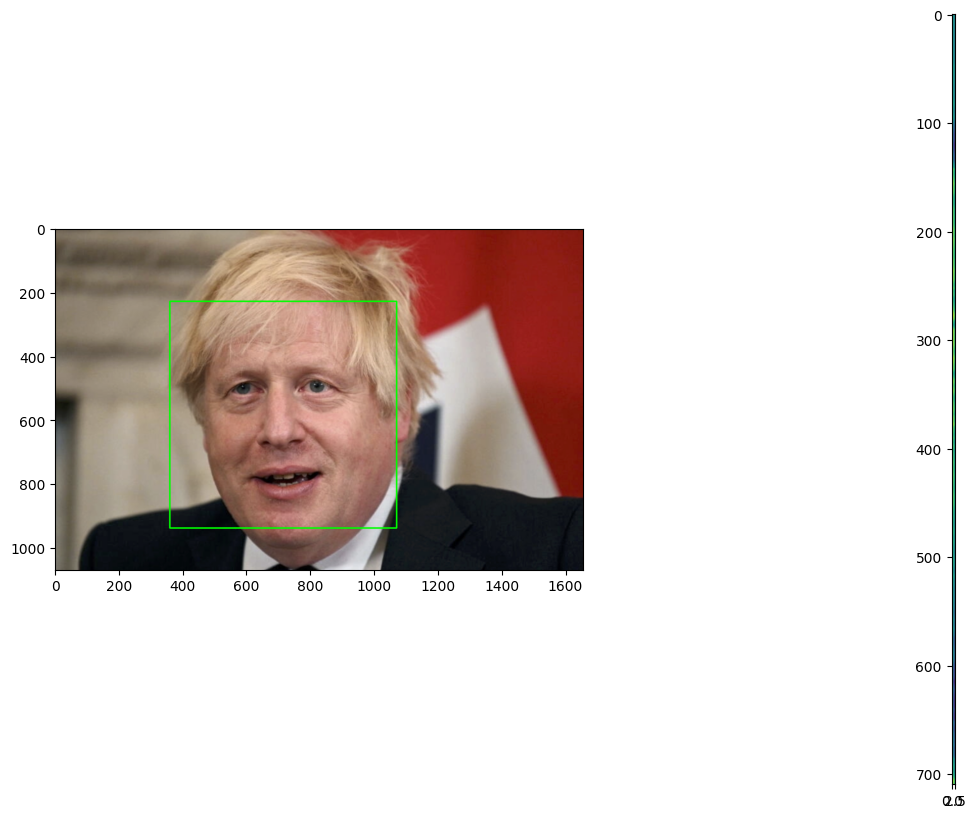

In [17]:
plt.subplot(121), plt.imshow(result, cmap='gray')
plt.subplot(122), plt.imshow(face_img[0])

Number of detected faces: 1
rectangles[[(354, 280) (1019, 946)]]
<bound method PyCapsule.left of rectangle(354,280,1019,946)>
354 280 665 666


(<Axes: title={'center': 'dlib'}>,
 Text(0.5, 1.0, 'dlib'))

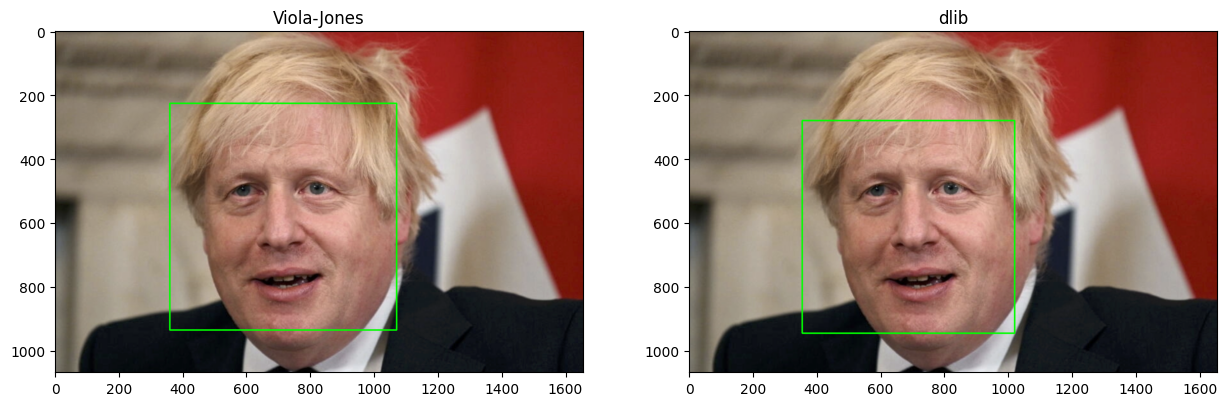

In [18]:
# Face Detection via dlib
import dlib
# Let's load the detector
detector = dlib.get_frontal_face_detector()
# Detect faces, see http://dlib.net/face_detector.py.html
# 1 --> upsampling factor
rects = detector(gray, 1)

print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


# Draw rectangle around each face
result_dlib = np.copy(img)
faces_dlib_img = []
for rect in rects:
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])


plt.subplot(121), plt.imshow(result), plt.title('Viola-Jones')
plt.subplot(122), plt.imshow(result_dlib), plt.title('dlib')

In [36]:
# Load the predictor (you need to download the predictor from an available source)
predictor = dlib.shape_predictor('shape_predictor_81_face_landmarks.dat')

# Check if faces_dlib_img is not empty before accessing its elements
if len(faces_dlib_img) > 0:
    face = faces_dlib_img[0]  # Access the first face
    rows, cols, _ = face.shape
    rect = dlib.rectangle(0, 0, cols, rows)
    shape = predictor(cv2.cvtColor(face, cv2.COLOR_RGB2GRAY), rect)
else:
    print("No faces detected in the image.")





In [37]:
def plot_landmarks(vec):
    plt.plot(vec[0:17,0], vec[0:17,1], 'g.-')       # Contour
    plt.plot(vec[48:68,0], vec[48:68,1], 'g.-')     # Mouth
    plt.plot(vec[17:22,0], vec[17:22,1], 'g.-')     # Right eyebrow
    plt.plot(vec[22:27,0], vec[22:27,1], 'g.-')     # Left eyebrow
    plt.plot(np.concatenate((vec[36:42,0], vec[36:37,0])), np.concatenate((vec[36:42,1], vec[36:37,1])), 'g.-')     # Left eye
    plt.plot(np.concatenate((vec[42:48,0], vec[42:43,0])), np.concatenate((vec[42:48,1], vec[42:43,1])), 'g.-')     # Right eye
    plt.plot(vec[27:36,0], vec[27:36,1], 'g.-')     # Nose

In [38]:
# Convert landmarks to ndarray for better manipulation
kps = list(map(lambda p: (p.x, p.y), shape.parts()))
landmarks = np.array(kps)
print(kps)

[(105, 263), (109, 333), (118, 403), (132, 473), (153, 541), (191, 603), (243, 653), (307, 689), (385, 697), (465, 686), (538, 650), (601, 601), (645, 537), (665, 462), (671, 384), (673, 308), (674, 231), (145, 210), (170, 175), (214, 161), (261, 162), (306, 173), (380, 166), (431, 148), (486, 146), (539, 157), (580, 187), (344, 217), (343, 265), (342, 313), (342, 363), (298, 399), (323, 410), (352, 418), (382, 406), (410, 394), (196, 240), (220, 219), (253, 218), (283, 237), (254, 244), (222, 246), (428, 229), (457, 206), (491, 206), (522, 223), (494, 232), (461, 233), (261, 504), (292, 480), (328, 468), (358, 474), (392, 465), (439, 473), (484, 490), (445, 531), (402, 551), (366, 557), (334, 556), (297, 542), (276, 505), (330, 491), (360, 492), (394, 487), (468, 492), (397, 518), (363, 523), (332, 521), (143, 13), (191, -2), (267, 6), (357, 3), (497, -18), (568, 1), (639, 117), (117, 107), (135, 42), (107, 232), (662, 201), (590, 40), (456, -2)]


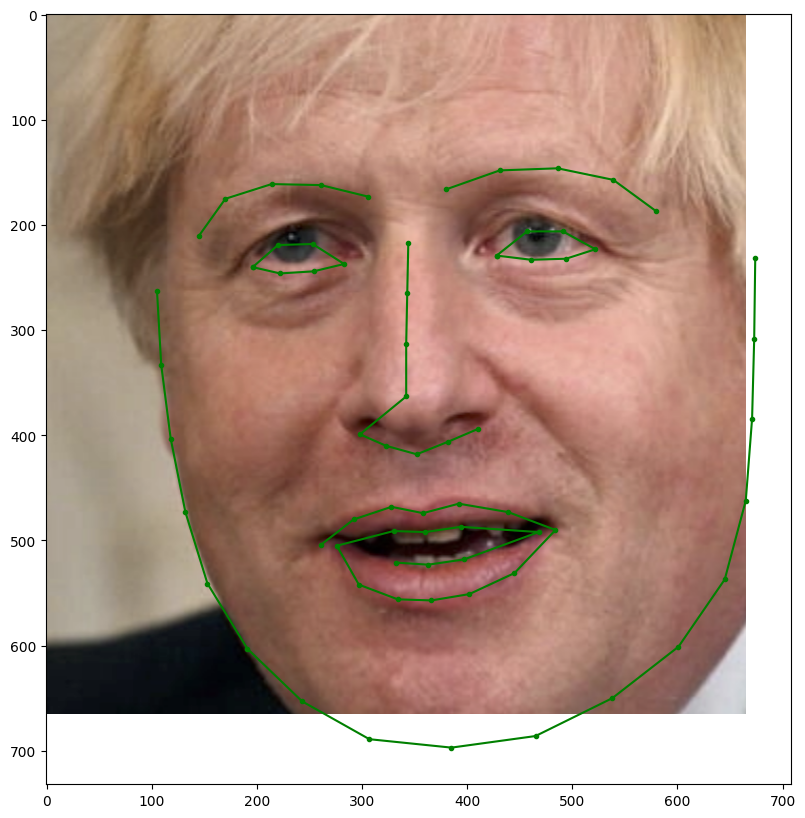

In [39]:
plt.imshow(face)
plot_landmarks(landmarks)